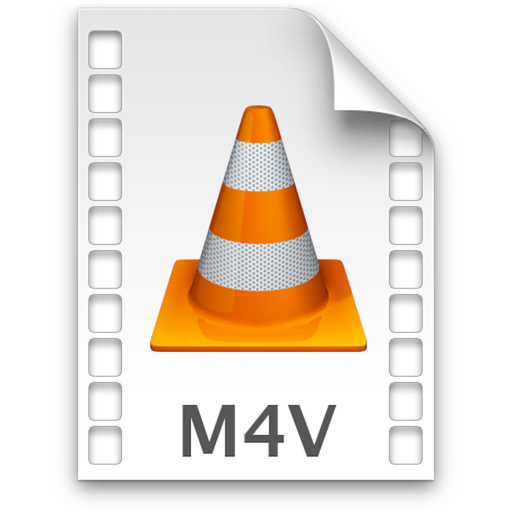# Interactive Notebook Demo with ImGui Bundle

This notebook demonstrates the **interactive, non-blocking** features of ImGui Bundle in Jupyter notebooks.

With `immapp.nb.start()`, you can:
- Start a GUI that runs in a separate window
- Continue executing notebook cells while the GUI is running
- Modify Python variables and see updates in the GUI **in real-time**
- Use the GUI for live data visualization, parameter tuning, and more

Let's get started! 🚀

In [1]:
# Import necessary libraries
from imgui_bundle import immapp, imgui, hello_imgui, implot
import numpy as np
import time

objc[8549]: Class GLFWHelper is implemented in both /Users/pascal/dvp/OpenSource/ImGuiWork/_Bundle/imgui_bundle/v314/lib/python3.14/site-packages/imgui_bundle/libglfw.3.dylib (0x10ceb9158) and /Users/pascal/dvp/OpenSource/ImGuiWork/_Bundle/imgui_bundle/bindings/imgui_bundle/libglfw.3.dylib (0x114e9d158). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[8549]: Class GLFWApplicationDelegate is implemented in both /Users/pascal/dvp/OpenSource/ImGuiWork/_Bundle/imgui_bundle/v314/lib/python3.14/site-packages/imgui_bundle/libglfw.3.dylib (0x10ceb91a8) and /Users/pascal/dvp/OpenSource/ImGuiWork/_Bundle/imgui_bundle/bindings/imgui_bundle/libglfw.3.dylib (0x114e9d1a8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[8549]: Class GLFWWindowDelegate is implemented in both /Users/pascal/dvp/OpenSource/ImGuiWork/_Bundle/imgui_bundle/v314/lib/python3.14/site-

## Example 1: Simple Counter with Live Updates

Let's start with the simplest possible example: a counter that you can control from the notebook.

In [2]:
# Create shared state using a mutable container (dict)
# This allows both the GUI and notebook cells to access the same data
counter = {"value": 0}

def counter_gui():
    """Simple GUI that displays and modifies the counter"""
    imgui.text(f"Counter Value: {counter['value']}")
    
    if imgui.button("Increment"):
        counter["value"] += 1
    
    imgui.same_line()
    if imgui.button("Decrement"):
        counter["value"] -= 1
    
    if imgui.button("Reset"):
        counter["value"] = 0
    
    imgui.separator()
    imgui.text("You can also modify the counter from notebook cells!")
    imgui.text("Try running the cells below while this window is open.")
    
    if imgui.button("Close"):
        hello_imgui.get_runner_params().app_shall_exit = True

# Start the GUI (non-blocking!)
immapp.nb.start(counter_gui, window_title="Counter Demo", window_size_auto=True)

print("✓ GUI started! The notebook is still responsive.")
print("✓ Run the cells below to modify the counter from the notebook.")

✓ GUI started! The notebook is still responsive.
✓ Run the cells below to modify the counter from the notebook.


**🎯 Try this**: Run the cell below to change the counter value from the notebook.  
Watch the GUI window - it will update **immediately**!

In [3]:
# Modify the counter from the notebook
counter["value"] = 100
print(f"✓ Set counter to {counter['value']} - check the GUI window!")

✓ Set counter to 100 - check the GUI window!


In [5]:
# You can also do arithmetic operations
counter["value"] += 50
print(f"✓ Incremented by 50, now: {counter['value']}")

✓ Incremented by 50, now: 201


In [6]:
# Check the current status
print(f"GUI running: {immapp.nb.is_running()}")
print(f"Current counter value: {counter['value']}")

GUI running: True
Current counter value: 201


In [7]:
# Stop the GUI when you're done
immapp.nb.stop()
print("✓ GUI stopped")

✓ GUI stopped


## Example 2: Live Data Visualization with ImPlot

Now let's create something more interesting: **live plotting** with real-time data updates.

This demonstrates one of the most powerful features - updating plots on-the-fly from notebook cells.

In [8]:
# Create plot data
plot_data = {
    "x": np.linspace(0, 10, 200, dtype=np.float32),
    "y": np.sin(np.linspace(0, 10, 200, dtype=np.float32)),
    "title": "sin(x)"
}

def plot_gui():
    """GUI that displays a live plot"""
    imgui.text(f"Live Plot: {plot_data['title']}")
    imgui.text(f"Data points: {len(plot_data['x'])}")
    imgui.separator()
    
    # Display the plot
    if implot.begin_plot("Live Data Plot", hello_imgui.em_to_vec2(40, 20)):
        implot.plot_line("Signal", plot_data["x"], plot_data["y"])
        implot.end_plot()
    
    imgui.separator()
    imgui.text_wrapped(
        "Modify the plot_data dictionary from notebook cells "
        "to see the plot update in real-time!"
    )
    
    if imgui.button("Close"):
        hello_imgui.get_runner_params().app_shall_exit = True

# Start GUI with ImPlot support
immapp.nb.start(
    plot_gui,
    window_title="Live Plot Demo",
    window_size_auto=True,
    with_implot=True  # Enable ImPlot addon
)

print("✓ Plot GUI started!")
print("✓ Run the cells below to modify the plot.")

✓ Plot GUI started!
✓ Run the cells below to modify the plot.


**🎯 Try these**: Each cell below will transform the plot differently. Watch the GUI update instantly!

In [9]:
# Transform to cosine wave
plot_data["y"] = np.cos(plot_data["x"])
plot_data["title"] = "cos(x)"
print("✓ Changed to cosine wave - check the plot!")

✓ Changed to cosine wave - check the plot!


In [10]:
# Increase frequency
plot_data["y"] = np.sin(plot_data["x"] * 3)
plot_data["title"] = "sin(3x)"
print("✓ Increased frequency - check the plot!")

✓ Increased frequency - check the plot!


In [11]:
# Add noise
plot_data["y"] = np.sin(plot_data["x"]) + np.random.normal(0, 0.1, len(plot_data["x"]))
plot_data["title"] = "sin(x) + noise"
print("✓ Added noise - check the plot!")

✓ Added noise - check the plot!


In [12]:
# Increase resolution
plot_data["x"] = np.linspace(0, 10, 1000, dtype=np.float32)
plot_data["y"] = np.sin(plot_data["x"])
plot_data["title"] = f"sin(x) - {len(plot_data['x'])} points"
print(f"✓ Increased resolution to {len(plot_data['x'])} points - check the plot!")

✓ Increased resolution to 1000 points - check the plot!


In [13]:
# Stop the plot GUI
immapp.nb.stop()
print("✓ Plot GUI stopped")

✓ Plot GUI stopped


## Example 3: Real-Time Data Stream Simulation

This example simulates a **live data stream** that continuously updates, like you might see in a monitoring dashboard or during ML training.

In [13]:
from imgui_bundle import immapp, imgui, hello_imgui, implot
import numpy as np
import time

# Streaming data buffer
stream_data = {
    "values": [],
    "max_points": 100,
    "paused": False
}

def streaming_gui():
    """GUI that shows a live streaming plot"""
    imgui.text("Live Data Stream")
    imgui.text(f"Points: {len(stream_data['values'])}")
    
    # Control buttons
    if imgui.button("Pause" if not stream_data["paused"] else "Resume"):
        stream_data["paused"] = not stream_data["paused"]
    
    imgui.same_line()
    if imgui.button("Clear"):
        stream_data["values"].clear()
    
    imgui.separator()
    
    # Plot the streaming data
    if len(stream_data["values"]) > 0:
        if implot.begin_plot("Data Stream", hello_imgui.em_to_vec2(40, 15)):
            x_data = np.arange(len(stream_data["values"]), dtype=np.float32)
            y_data = np.array(stream_data["values"], dtype=np.float32)
            implot.setup_axes("x", "y", implot.AxisFlags_.auto_fit, implot.AxisFlags_.auto_fit)
            implot.plot_line("Value", x_data, y_data)
            implot.end_plot()
    
    if imgui.button("Close"):
        hello_imgui.get_runner_params().app_shall_exit = True

# Start streaming GUI (note: immapp.nb.start is non-blocking 
# and immediately returns an asyncio task)
immapp.nb.start(
    streaming_gui,
    window_title="Data Stream Demo",
    window_size=(800, 400),
    with_implot=True
)

print("✓ Streaming GUI started!")
print("✓ Run the next cell to start the data stream.")

✓ Streaming GUI started!
✓ Run the next cell to start the data stream.


In [16]:
# Simulate a data stream: this will add data points while the GUI displays them in real-time. 
# * The GUI is already running above (in an asyncio task)
# * So, we define another asyncio task to add data points (stream_data_loop below) 
#   and we run it in async way. This task will run for 10 seconds.

import time
import random
import asyncio

async def stream_data_loop():
    print("Starting data stream... (will run for 10 seconds)")
    start_time = time.time()

    while time.time() - start_time < 10 and immapp.nb.is_running():
        if not stream_data["paused"]:
            # Add new data point
            new_value = np.sin(time.time()) + random.gauss(0, 0.1)
            stream_data["values"].append(new_value)
            
            # Keep buffer size limited
            if len(stream_data["values"]) > stream_data["max_points"]:
                stream_data["values"].pop(0)
        
        #time.sleep(0.1)  # 10 Hz update rate
        await asyncio.sleep(0.1)

    print(f"✓ Stream finished. Final count: {len(stream_data['values'])} points")

# Run the streaming loop
await stream_data_loop()

Starting data stream... (will run for 10 seconds)
✓ Stream finished. Final count: 200 points


In [6]:
# Stop the streaming GUI
immapp.nb.stop()
print("✓ Streaming GUI stopped")

✓ Streaming GUI stopped


## Example 4: Interactive Parameter Dashboard

This example shows how you can use the GUI for **interactive parameter tuning** - useful for algorithm development and experimentation.

In [17]:
# Parameters and computed result
params = {
    "frequency": 2.0,
    "amplitude": 1.0,
    "phase": 0.0,
    "noise_level": 0.0,
    "x": np.linspace(0, 10, 200, dtype=np.float32),
    "y": None
}

def compute_signal():
    """Recompute signal based on current parameters"""
    params["y"] = (
        params["amplitude"] * 
        np.sin(params["frequency"] * params["x"] + params["phase"]) +
        np.random.normal(0, params["noise_level"], len(params["x"]))
    ).astype(np.float32)

def parameter_gui():
    """Interactive parameter tuning GUI"""
    imgui.text("Signal Parameter Tuner")
    imgui.separator()
    
    # Parameter sliders
    changed = False
    
    c, params["frequency"] = imgui.slider_float(
        "Frequency", params["frequency"], 0.1, 10.0
    )
    changed = changed or c
    
    c, params["amplitude"] = imgui.slider_float(
        "Amplitude", params["amplitude"], 0.0, 2.0
    )
    changed = changed or c
    
    c, params["phase"] = imgui.slider_float(
        "Phase", params["phase"], 0.0, 2 * np.pi
    )
    changed = changed or c
    
    c, params["noise_level"] = imgui.slider_float(
        "Noise Level", params["noise_level"], 0.0, 0.5
    )
    changed = changed or c
    
    # Recompute if parameters changed
    if changed:
        compute_signal()
    
    imgui.separator()
    
    # Display the result
    if params["y"] is not None:
        if implot.begin_plot("Signal", hello_imgui.em_to_vec2(40, 20)):
            implot.plot_line("Output", params["x"], params["y"])
            implot.end_plot()
    
    if imgui.button("Close"):
        hello_imgui.get_runner_params().app_shall_exit = True

# Initial computation
compute_signal()

# Start parameter tuning GUI
immapp.nb.start(
    parameter_gui,
    window_title="Parameter Tuner",
    window_size_auto=True,
    with_implot=True
)

print("✓ Parameter tuner started!")
print("✓ Use the sliders in the GUI to adjust parameters.")
print("✓ You can also modify params from the notebook.")

✓ Parameter tuner started!
✓ Use the sliders in the GUI to adjust parameters.
✓ You can also modify params from the notebook.


In [18]:
# Set specific parameter values from notebook
params["frequency"] = 5.0
params["amplitude"] = 1.5
params["noise_level"] = 0.2
compute_signal()
print("✓ Updated parameters from notebook - check the GUI!")

✓ Updated parameters from notebook - check the GUI!


In [19]:
# Stop the parameter tuner
immapp.nb.stop()
print("✓ Parameter tuner stopped")

✓ Parameter tuner stopped


## Summary and Key Takeaways

This notebook demonstrated the powerful **interactive notebook features** of ImGui Bundle:

### What We Learned

1. **Non-blocking Execution**: `immapp.nb.start()` returns immediately, keeping the notebook responsive

2. **Live Variable Updates**: Modify Python variables from notebook cells and see instant GUI updates

3. **Real-time Visualization**: Perfect for live data streams, monitoring, and exploration

4. **Interactive Tuning**: Combine GUI controls with notebook flexibility for parameter experimentation

### Key Functions

- `immapp.nb.start(gui_func, ...)`: Start GUI non-blocking
- `immapp.nb.stop()`: Stop the running GUI
- `immapp.nb.is_running()`: Check if GUI is active
- `immapp.nb.run(gui_func, ...)`: Blocking mode with screenshot (traditional)

### Best Practices

- ✅ Use **mutable containers** (dict, list) for shared state
- ✅ Set `window_size_auto=True` for auto-sizing GUIs
- ✅ Set `top_most=True` to keep GUI above browser
- ✅ Use `with_implot=True` for plotting features
- ✅ Always `stop()` before starting a new GUI

### Use Cases

- **Data Exploration**: Visualize and manipulate datasets interactively
- **ML Training**: Monitor metrics in real-time during training
- **Algorithm Development**: Tune parameters and see immediate results
- **Live Monitoring**: Display streaming data from sensors or processes

### Next Steps

- Read the [full documentation](https://pthom.github.io/imgui_bundle/book/python/notebooks.html)
- Explore the [async execution guide](https://pthom.github.io/imgui_bundle/book/python/python_async.html)
- Check out the [test notebooks](.) for more examples
- Try building your own interactive dashboards!

Happy coding! 🎉